# German Credit Risk 
Source: https://www.kaggle.com/datasets/kabure/german-credit-data-with-risk

## Data Understanding and Data Preparation

https://www.kaggle.com/datasets/uciml/german-credit/data

- Age (numeric)
 - Sex (text: male, female)
 - Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
 - Housing (text: own, rent, or free)
 - Saving accounts (text: little, moderate, quite rich, rich)
 - Checking account (numeric, in DM - Deutsch Mark)
 - Credit amount (numeric, in DM)
 - Duration (numeric, in month)
 - Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
 - Risk (text: good, bad)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv(r"C:\Users\Besitzer\Downloads\german_credit_data.xls")

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [5]:
df.drop(["Unnamed: 0"],axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [7]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [8]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [9]:
df.drop(["Checking account"],axis=1, inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum()

Age                0
Sex                0
Job                0
Housing            0
Saving accounts    0
Credit amount      0
Duration           0
Purpose            0
Risk               0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 1 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              817 non-null    int64 
 1   Sex              817 non-null    object
 2   Job              817 non-null    int64 
 3   Housing          817 non-null    object
 4   Saving accounts  817 non-null    object
 5   Credit amount    817 non-null    int64 
 6   Duration         817 non-null    int64 
 7   Purpose          817 non-null    object
 8   Risk             817 non-null    object
dtypes: int64(4), object(5)
memory usage: 63.8+ KB


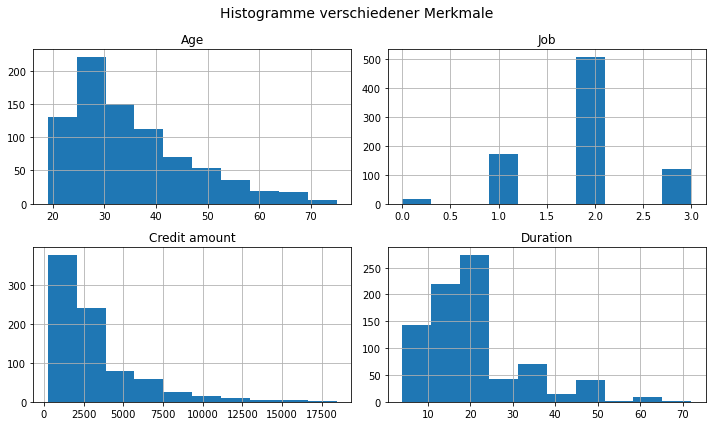

In [13]:
df.hist(column=["Age","Job","Credit amount","Duration"], bins=10, figsize=(10, 6))
plt.suptitle("Histogramme verschiedener Merkmale",  fontsize=14)
plt.tight_layout(); 

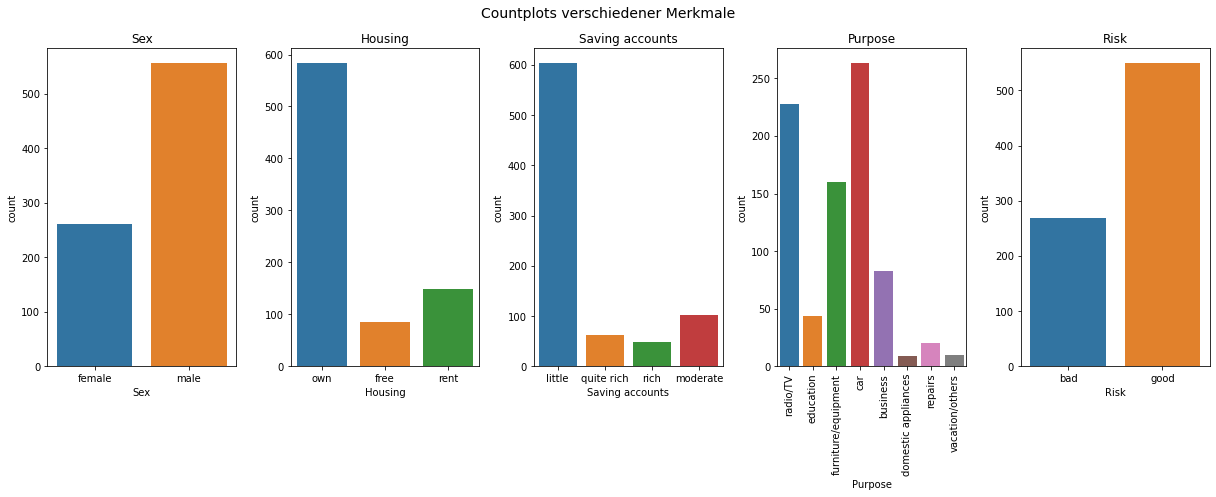

In [14]:
columns_to_plot = ["Sex","Housing","Saving accounts","Purpose","Risk"]
num_plots = len(columns_to_plot)
fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(17, 7))
for i, col in enumerate(columns_to_plot):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    if col == 'Purpose':
        axes[i].tick_params(axis="x", rotation=90)
plt.suptitle("Countplots verschiedener Merkmale",  fontsize=14)
plt.tight_layout(); 

In [15]:
label_encoder = LabelEncoder()
df["Sex"] = label_encoder.fit_transform(df["Sex"])
df["Saving accounts"] = label_encoder.fit_transform(df["Saving accounts"])
df["Risk"] = label_encoder.fit_transform(df["Risk"])
#One Hot Encoding
df = pd.get_dummies(df, columns=["Housing", "Purpose"])

In [16]:
first_column = df.pop("Risk") 
df.insert(0, "Risk", first_column) 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 1 to 999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Risk                         817 non-null    int32
 1   Age                          817 non-null    int64
 2   Sex                          817 non-null    int32
 3   Job                          817 non-null    int64
 4   Saving accounts              817 non-null    int32
 5   Credit amount                817 non-null    int64
 6   Duration                     817 non-null    int64
 7   Housing_free                 817 non-null    uint8
 8   Housing_own                  817 non-null    uint8
 9   Housing_rent                 817 non-null    uint8
 10  Purpose_business             817 non-null    uint8
 11  Purpose_car                  817 non-null    uint8
 12  Purpose_domestic appliances  817 non-null    uint8
 13  Purpose_education            817 non-null    uint8

In [18]:
df.head(10)

,Risk,Age,Sex,Job,Saving accounts,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
1,0,22,0,2,0,5951,48,0,1,0,0,0,0,0,0,1,0,0
2,1,49,1,1,0,2096,12,0,1,0,0,0,0,1,0,0,0,0
3,1,45,1,2,0,7882,42,1,0,0,0,0,0,0,1,0,0,0
4,0,53,1,2,0,4870,24,1,0,0,0,1,0,0,0,0,0,0
6,1,53,1,2,2,2835,24,0,1,0,0,0,0,0,1,0,0,0
7,1,35,1,3,0,6948,36,0,0,1,0,1,0,0,0,0,0,0
8,1,61,1,1,3,3059,12,0,1,0,0,0,0,0,0,1,0,0
9,0,28,1,3,0,5234,30,0,1,0,0,1,0,0,0,0,0,0
10,0,25,0,2,0,1295,12,0,0,1,0,1,0,0,0,0,0,0
11,0,24,0,2,0,4308,48,0,0,1,1,0,0,0,0,0,0,0


In [19]:
df_corr=df.corr()
df_corr=df_corr.sort_values(by="Risk", ascending=False)
df_corr

,Risk,Age,Sex,Job,Saving accounts,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
Risk,1.000000,0.077953,0.058062,-0.036742,0.145097,-0.194125,-0.272686,-0.094932,0.151324,-0.102104,-0.041193,-0.015224,-0.001192,-0.087390,-0.009955,0.109216,-0.024283,-0.017064
Housing_own,0.151324,-0.009361,0.117561,-0.077186,0.018175,-0.100508,-0.076805,-0.537874,1.000000,-0.745472,0.051730,-0.085030,0.040925,-0.088729,-0.055765,0.134619,0.012759,-0.003345
Saving accounts,0.145097,0.037330,-0.005562,-0.031768,1.000000,-0.063939,-0.031947,-0.049865,0.018175,0.018148,0.023813,0.026920,0.012027,-0.019273,-0.025019,-0.012856,0.017039,-0.032870
Purpose_radio/TV,0.109216,-0.055827,-0.006805,-0.029228,-0.012856,-0.173148,-0.057255,-0.122635,0.134619,-0.060642,-0.209219,-0.428680,-0.065664,-0.148438,-0.307034,1.000000,-0.098559,-0.069258
Age,0.077953,1.000000,0.150733,-0.015036,0.037330,0.026014,-0.045577,0.280024,-0.009361,-0.210442,0.000512,0.101297,0.018461,0.055173,-0.126014,-0.055827,0.051997,0.046845
Sex,0.058062,0.150733,1.000000,0.070399,-0.005562,0.071275,0.065814,0.078708,0.117561,-0.199864,0.065302,0.056290,-0.003140,-0.034233,-0.105085,-0.006805,0.040586,0.004646
Purpose_domestic appliances,-0.001192,0.018461,-0.003140,-0.000944,0.012027,-0.070118,-0.048032,-0.035964,0.040925,-0.019477,-0.035490,-0.072717,1.000000,-0.025180,-0.052083,-0.065664,-0.016719,-0.011748
Purpose_furniture/equipment,-0.009955,-0.126014,-0.105085,0.022852,-0.025019,-0.020910,-0.044961,-0.057040,-0.055765,0.110385,-0.165947,-0.340017,-0.052083,-0.117737,1.000000,-0.307034,-0.078174,-0.054934
Purpose_car,-0.015224,0.101297,0.056290,0.026795,0.026920,0.094846,-0.017200,0.117021,-0.085030,0.007025,-0.231694,1.000000,-0.072717,-0.164384,-0.340017,-0.428680,-0.109146,-0.076698
Purpose_vacation/others,-0.017064,0.046845,0.004646,0.137161,-0.032870,0.246622,0.104440,0.071448,-0.003345,-0.052574,-0.037433,-0.076698,-0.011748,-0.026558,-0.054934,-0.069258,-0.017634,1.000000


In [20]:
columns_to_keep=["Risk","Housing_own","Saving accounts","Credit amount","Duration"]
df = df[columns_to_keep]
df.head()

,Risk,Housing_own,Saving accounts,Credit amount,Duration
1,0,1,0,5951,48
2,1,1,0,2096,12
3,1,0,0,7882,42
4,0,0,0,4870,24
6,1,1,2,2835,24


In [21]:
df.corr()

,Risk,Housing_own,Saving accounts,Credit amount,Duration
Risk,1.000000,0.151324,0.145097,-0.194125,-0.272686
Housing_own,0.151324,1.000000,0.018175,-0.100508,-0.076805
Saving accounts,0.145097,0.018175,1.000000,-0.063939,-0.031947
Credit amount,-0.194125,-0.100508,-0.063939,1.000000,0.631132
Duration,-0.272686,-0.076805,-0.031947,0.631132,1.000000


In [22]:
df.to_csv("german_credit_data_cleaned.csv", index=False)

## Modeling (Machine Learning)
### Classification

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [24]:
df=pd.read_csv(r"german_credit_data_cleaned.csv")
df.head()

,Risk,Housing_own,Saving accounts,Credit amount,Duration
0,0,1,0,5951,48
1,1,1,0,2096,12
2,1,0,0,7882,42
3,0,0,0,4870,24
4,1,1,2,2835,24


In [25]:
X = df.drop(columns=["Risk"])
y= df["Risk"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Skalierung bei baumbasierten Algorithemen nicht unbedingt notwendig
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [28]:
predictions = rf.predict(X_test_scaled)

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.42      0.32      0.36        47
           1       0.75      0.82      0.78       117

    accuracy                           0.68       164
   macro avg       0.58      0.57      0.57       164
weighted avg       0.65      0.68      0.66       164



In [30]:
def grid_search(param_grid, model):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring="accuracy",verbose=2)
    grid_search.fit(X_train, y_train)
    best_rf_model = grid_search.best_estimator_
    y_pred = best_rf_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    return "Beste Parameter:", grid_search.best_params_, "Beste Genauigkeit:", grid_search.best_score_, "Testgenauigkeit:", test_accuracy

In [31]:
param_grid = {
        'n_estimators': [40,42,44],
        'max_depth': [5,6,7],
        'min_samples_split': [12,13,14],
        'min_samples_leaf': [3,4,5]}
result=grid_search(param_grid, rf)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=42; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=42; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=42; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=44; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=44; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=44; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf

[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=12, n_estimators=42; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=12, n_estimators=42; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=12, n_estimators=42; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=12, n_estimators=44; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=12, n_estimators=44; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=12, n_estimators=44; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=13, n_estimators=40; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=13, n_estimators=40; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=13, n_estimators=40; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=13, n_estimators=42; total time=   0.0s


[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=12, n_estimators=42; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=12, n_estimators=42; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=12, n_estimators=44; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=12, n_estimators=44; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=12, n_estimators=44; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=13, n_estimators=40; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=13, n_estimators=40; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=13, n_estimators=40; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=13, n_estimators=42; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=3, min_samples_split=13, n_estimators=42; total time=   0.0s


In [32]:
print(result)

('Beste Parameter:', {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 13, 'n_estimators': 42}, 'Beste Genauigkeit:', 0.7243196775602813, 'Testgenauigkeit:', 0.7560975609756098)


In [33]:
best_params = result[1]
best_model = RandomForestClassifier(random_state=42, **best_params)
best_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=13,
                       n_estimators=42, random_state=42)

In [34]:
predictions = best_model.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.21      0.33        47
           1       0.75      0.97      0.85       117

    accuracy                           0.76       164
   macro avg       0.76      0.59      0.59       164
weighted avg       0.76      0.76      0.70       164



<AxesSubplot:>

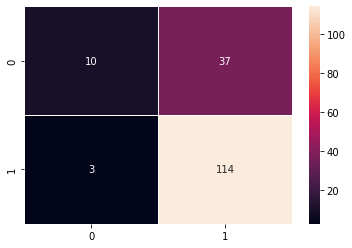

In [35]:
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

### SMOTE

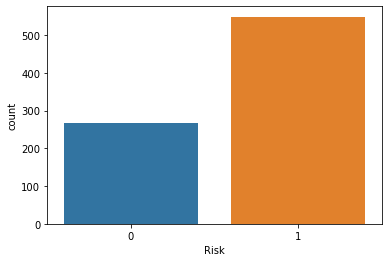

In [36]:
sns.countplot(x="Risk", data=df);
#Klasse 0 deutlich unterrepräsentiert

In [37]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)
rf_smote = RandomForestClassifier(random_state=42, **best_params)
rf_smote.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=13,
                       n_estimators=42, random_state=42)

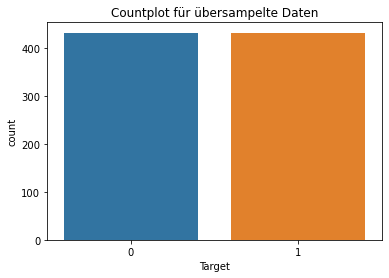

In [38]:
df_resampled = pd.DataFrame(X_resampled, columns=X_train.columns)
df_resampled["Target"] = y_resampled
sns.countplot(x="Target", data=df_resampled)
plt.title("Countplot für übersampelte Daten")
plt.show()

In [39]:
predictions_smote=rf_smote.predict(X_test_resampled)
print(classification_report(y_test_resampled,predictions_smote))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       117
           1       0.72      0.74      0.73       117

    accuracy                           0.72       234
   macro avg       0.72      0.72      0.72       234
weighted avg       0.72      0.72      0.72       234



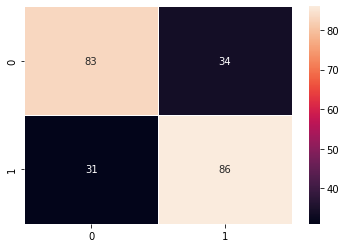

In [40]:
cf_matrix = confusion_matrix(y_test_resampled, predictions_smote)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g');